In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%run finance.ipynb

names = ['MSCI World', "MSCI World", 'S&P 500', 'Euro Stoxx 50 Nr.1', \
         'China', 'India', 'Emerging Asia', 'Small Caps USA Nr.1', \
        'Small Caps USA Nr.2', 'Dividenden Aristocrats Nr.1', 'Dividenden Aristocrats Nr.2', 'Growth Nr.1', 'Growth Nr.2',  \
        'REIT', 'TIPS', 'Money Market', 'GER Bonds 10y','US Bonds 1-3y', 'US Bonds 20y']

ETFs = ['WLD.PA', 'EUNL.DE', 'SPY', 'EXFN.L',  \
        'LG9.SI', 'LG8.SI', 'AASI.PA', 'SXRG.F', 'ISP6.L', 'XDND.F', 'UDVD.L', 'IDJG.AS', 'LGWT.DE', \
            'XREA.F', 'EMI.MI', 'C101.F', '8523.F', 'XUT3.L', 'IDTL.L']

data = {}

text = "Nr         Category         Name         ISIN\n"  

In [368]:
bond_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="Bonds")
etf_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="ETF")
bond_info = bond_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]
etf_info = etf_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]

info = pd.concat([etf_info, bond_info])
info.reset_index(inplace=True)

for n, asset in enumerate(ETFs):
    full_name = str(info[info['yahoo ticker'] == asset]['Name']).split("\n")[0].split("    ")[1]
    ISIN = str(info[info['yahoo ticker'] == asset]['ISIN']).split("\n")[0].split("    ")[1]
    text += str(n) + "         " + names[n] + "         " + full_name + "         " + ISIN +"\n"

In [369]:
mindate = []
maxdate = []
all_dfs = []
for n, etf in enumerate(ETFs):
    df = pd.read_csv("data/{0}.csv".format(etf))
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    ### fill in missing data points
    df = clean_data_with_outliers(df)
    all_dfs.append(df)
    Min = df['Date'].min()
    Max = df['Date'].max()
    ### Get overall daterange, where there is data for each stock
    mindate.append(Min)
    maxdate.append(Max)
### Get overlapping dates
mindate = max(sorted(mindate))
maxdate = min(sorted(maxdate))
range_days = int((maxdate - mindate).days) + 1
num_data = np.zeros((range_days, len(ETFs)))

for n, etf in enumerate(ETFs):
    df = all_dfs[n]
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    ### fill in missing data points
    data[etf] = np.array(df['Adj Close'][(df['Date'] >= mindate) & (df['Date'] <= maxdate)])
    num_data[:,n] = data[etf]
### each row represents data of one stock
num_data = num_data.transpose()
heat = pearson(num_data)

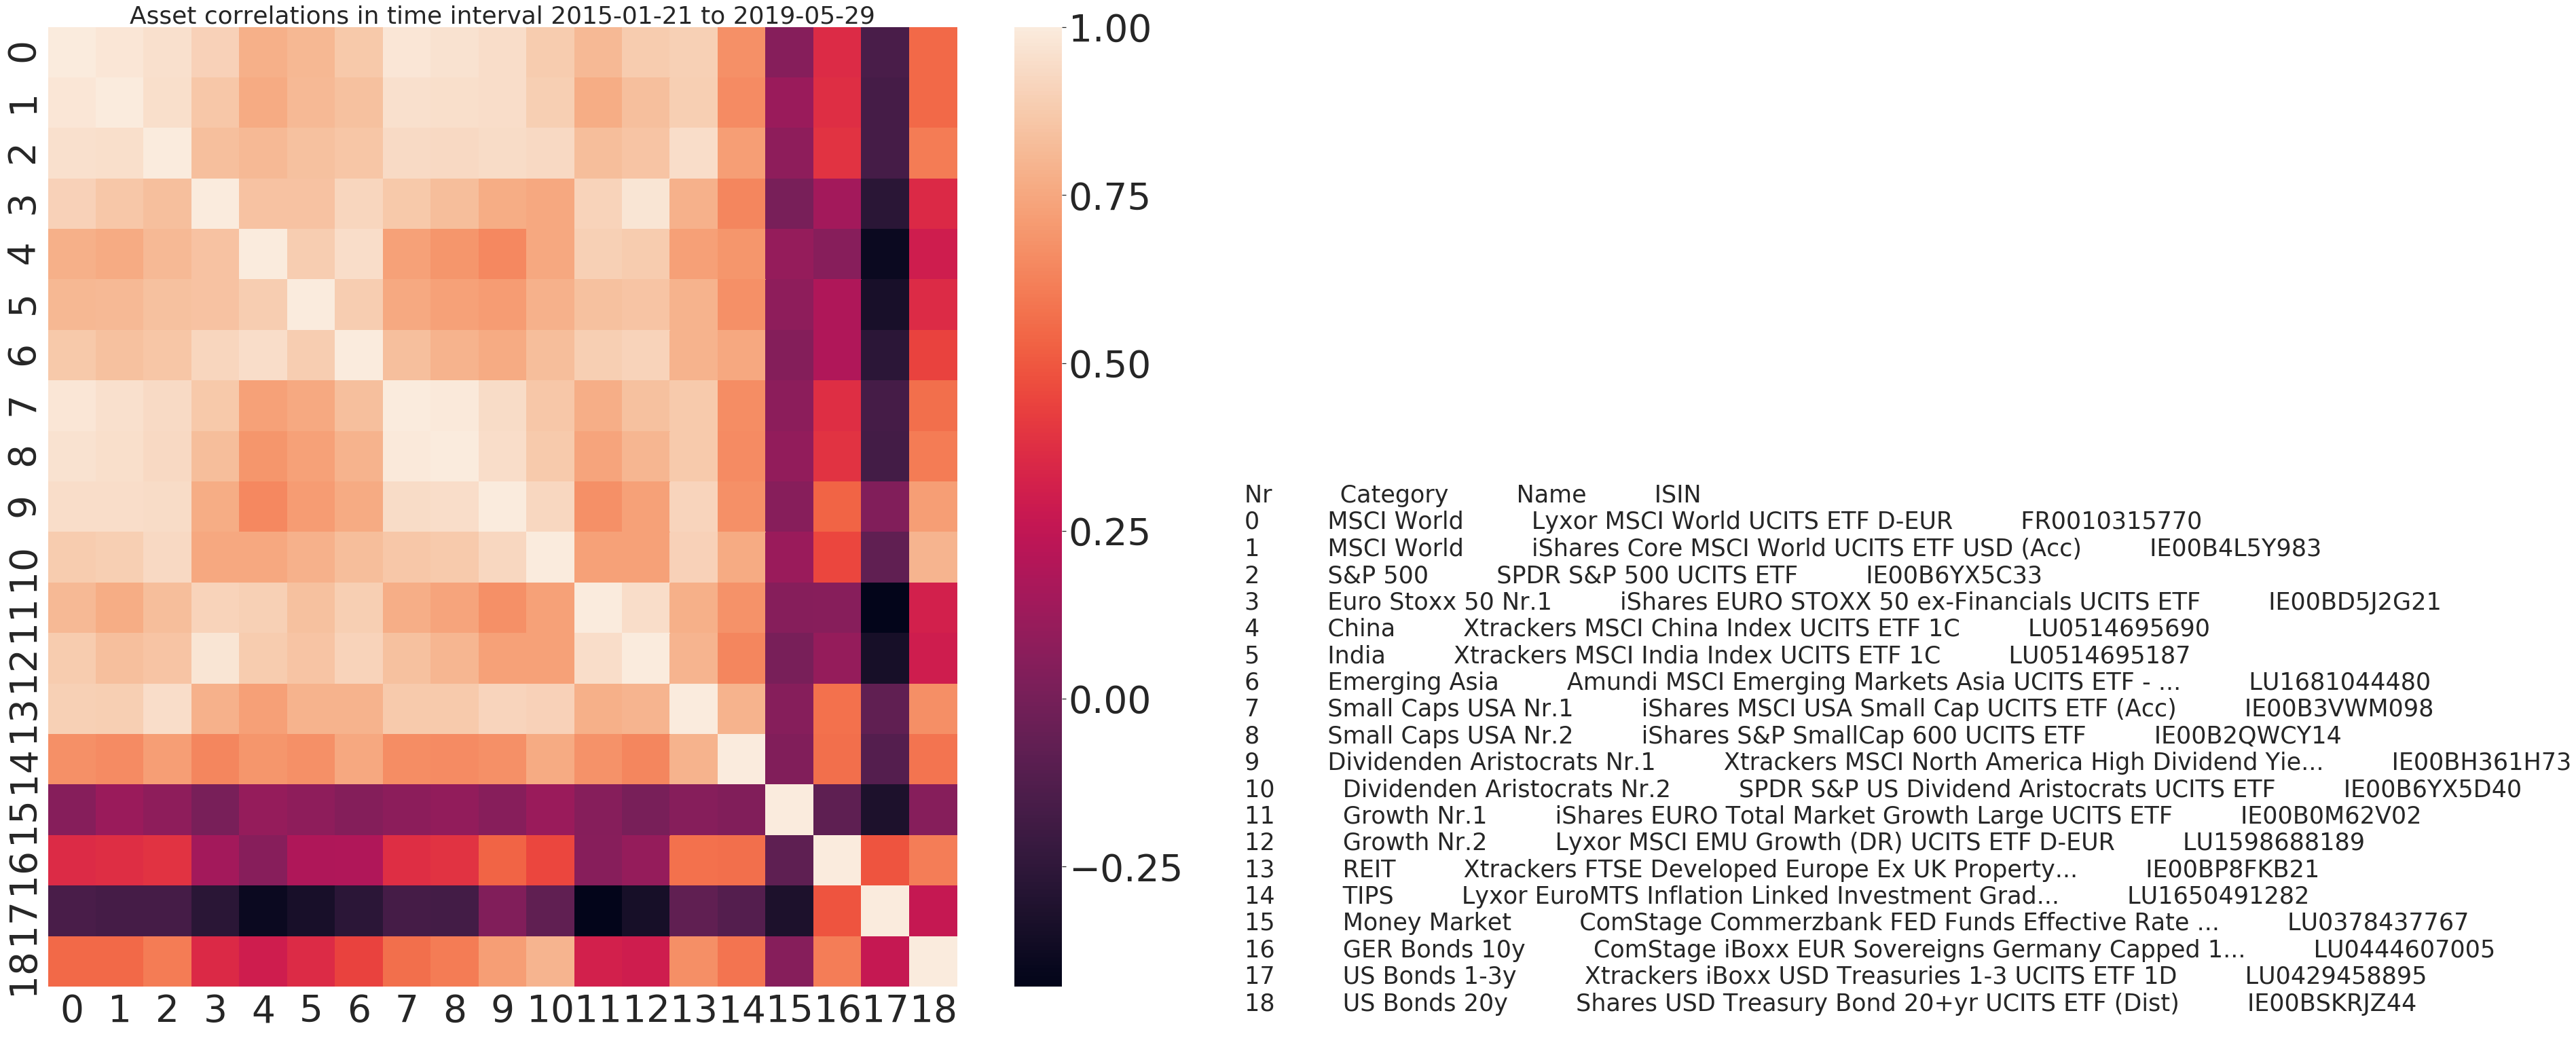

In [370]:
fig = plt.figure(figsize=(30,26))
plt.title("Asset correlations in time interval {0} to {1}".format(str(mindate).split(" ")[0], \
                                                               str(maxdate).split(" ")[0]), fontsize=36);
sns.heatmap(heat);
sns.set(font_scale=5)
plt.text(25,20, text, fontsize = 35);